In [1]:
!pip install pandas matplotlib seaborn wordcloud textblob
!pip install shapely
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob


In [3]:
# Load your Yelp reviews dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('yelp_preprocessed.csv')
df = df.drop(columns=['Unnamed: 0'])
df

id  \
0      XsXLVWr1UZWVhKThNvNiaA   
1      16ZnHpuaaBt92XWeJHCC5A   
2      QPEzLkO35OTYijFhs8d7-w   
3      C-8mGN7lt5rIraO5n-15ug   
4      qY1o1MhoRyN84RRhUJtvpQ   
...                       ...   
21664  B0eGzbgeVIhxninyFILzlQ   
21665  H5vjhRw2IpUky9heVdu0Vw   
21666  jTfdzsxqjU_xab3hn1ikjg   
21667  JB0hX6ZJ_2qMVHm34fVGQA   
21668  bf5yi4I40BKJLtv7SJJCeQ   

                                                   alias  \
0                             blue-willow-夜来湘-new-york-2   
1                                  olio-e-più-new-york-7   
2                              the-reading-room-new-york   
3                                   the-smith-new-york-2   
4                             her-name-is-han-new-york-3   
...                                                  ...   
21664               brooklyn-bridge-park-pier-5-brooklyn   
21665  new-york-city-vietnam-veterans-memorial-plaza-...   
21666                    amiable-child-monument-new-york   
21667                            gravesend-park-brooklyn   
21668                      albert-capsouto-park-new-york   

                                                name  \
0                                    Blue Willow 夜来湘   
1                                         Olio e Più   
2                                   The Reading Room   
3                                          The Smith   
4                                    Her Name Is Han   
...                                              ...   
21664                    Brooklyn Bridge Park Pier 5   
21665  New York City Vietnam Veterans Memorial Plaza   
21666                         Amiable Child Monument   
21667                                 Gravesend Park   
21668                           Albert Capsouto Park   

                                               image_url  is_closed  \
0      https://s3-media2.fl.yelpcdn.com/bphoto/1E59vO...      False   
1      https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz...      False   
2      https://s3-media3.fl.yelpcdn.com/bphoto/ovd46u...      False   
3      https://s3-media2.fl.yelpcdn.com/bphoto/B9c_dl...      False   
4      https://s3-media4.fl.yelpcdn.com/bphoto/yTJ5aC...      False   
...                                                  ...        ...   
21664  https://s3-media1.fl.yelpcdn.com/bphoto/G_sWRM...      False   
21665  https://s3-media4.fl.yelpcdn.com/bphoto/R-IMr8...      False   
21666  https://s3-media1.fl.yelpcdn.com/bphoto/BGNHIe...      False   
21667  https://s3-media4.fl.yelpcdn.com/bphoto/90eHm7...      False   
21668  https://s3-media2.fl.yelpcdn.com/bphoto/m2L1XQ...      False   

                                                     url  review_count  \
0      https://www.yelp.com/biz/blue-willow-%E5%A4%9C...           985   
1      https://www.yelp.com/biz/olio-e-pi%C3%B9-new-y...          4885   
2      https://www.yelp.com/biz/the-reading-room-new-...           102   
3      https://www.yelp.com/biz/the-smith-new-york-2?...          3147   
4      https://www.yelp.com/biz/her-name-is-han-new-y...          1867   
...                                                  ...           ...   
21664  https://www.yelp.com/biz/brooklyn-bridge-park-...            40   
21665  https://www.yelp.com/biz/new-york-city-vietnam...            14   
21666  https://www.yelp.com/biz/amiable-child-monumen...             3   
21667  https://www.yelp.com/biz/gravesend-park-brookl...             3   
21668  https://www.yelp.com/biz/albert-capsouto-park-...             4   

                                              categories  rating  \
0           [{'alias': 'szechuan', 'title': 'Szechuan'}]     4.5   
1      [{'alias': 'pizza', 'title': 'Pizza'}, {'alias...     4.5   
2      [{'alias': 'newamerican', 'title': 'New Americ...     4.5   
3      [{'alias': 'newamerican', 'title': 'New Americ...     4.0   
4      [{'alias': 'korean', 'title': 'Korean'}, {'ali...     4.5   
...                                                  ...     ...   
21664  [{'alias': 

In [4]:
df['rating'].value_counts().reset_index()

rating  count
0     4.0   5558
1     5.0   4876
2     4.5   4869
3     3.5   2893
4     3.0   1632
5     2.5    859
6     2.0    468
7     1.0    351
8     1.5    158
9     0.0      5

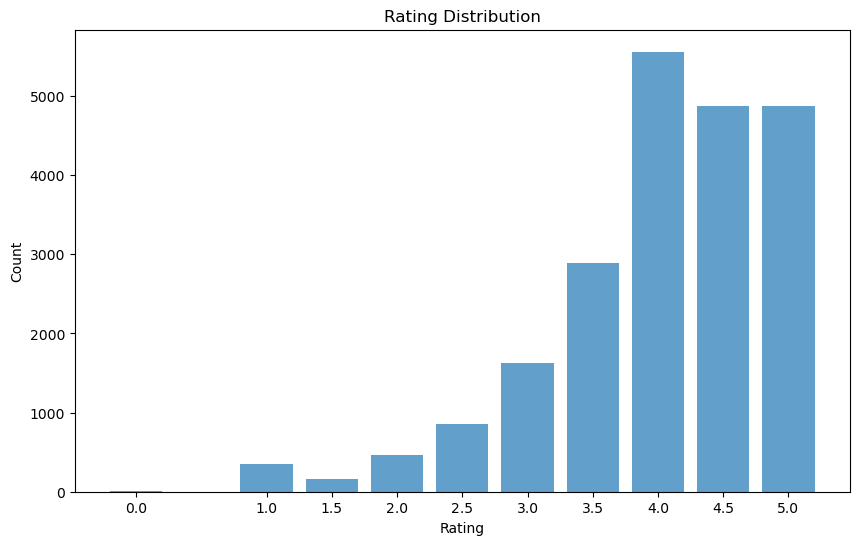

In [5]:

rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rating_counts['Rating'], rating_counts['Count'], width=0.4, align='center', alpha=0.7)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.xticks(rating_counts['Rating'])
# Show the plot
plt.show()


In [6]:
df['review_count'].value_counts().reset_index()

review_count  count
0                1   2382
1                2   1345
2                3   1018
3                4    805
4                5    636
...            ...    ...
1324           549      1
1325           838      1
1326          2629      1
1327          2131      1
1328          1164      1

[1329 rows x 2 columns]

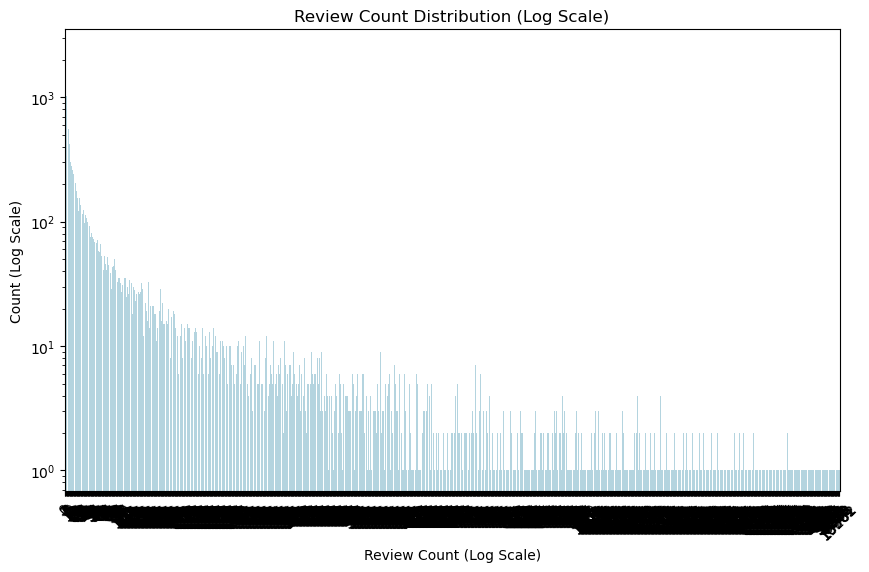

In [7]:
import seaborn as sns

# Get the value counts of review counts and create a DataFrame
review_counts = df['review_count'].value_counts().reset_index()
review_counts.columns = ['Review Count', 'Count']

# Create a bar plot using Seaborn on a log scale
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Count', y='Count', data=review_counts, color='lightblue')

# Set labels and title
plt.xlabel('Review Count (Log Scale)')
plt.ylabel('Count (Log Scale)')
plt.title('Review Count Distribution (Log Scale)')

# Set the y-axis to a log scale
plt.yscale('log')

# Customize x-axis labels to improve readability
plt.xticks(rotation=45)

# Show the plot
plt.show()




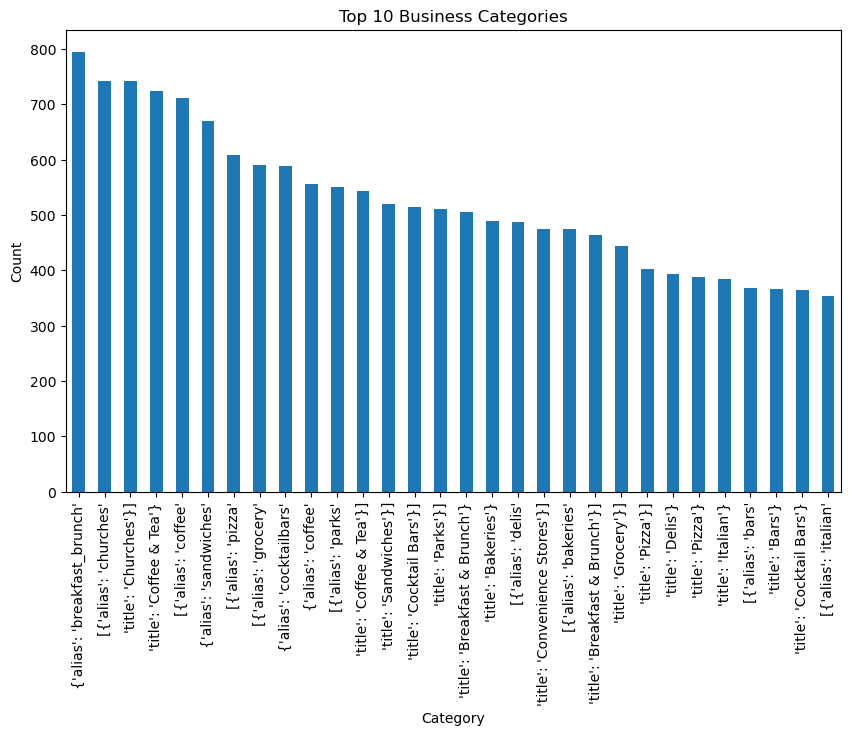

In [8]:
# 3. Category Breakdown
category_counts = df['categories'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
category_counts[:30].plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Business Categories')
plt.show()


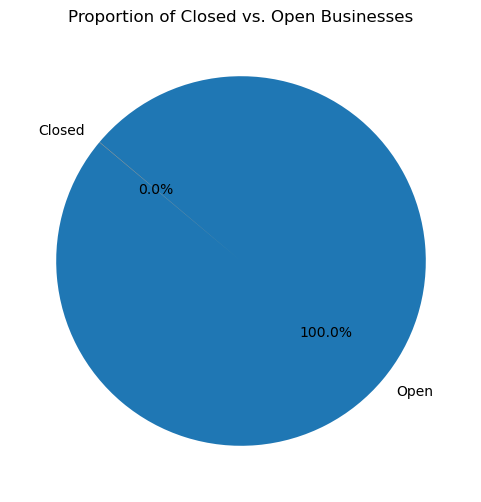

In [9]:
# 4. Closed vs. Open Businesses
closed_counts = df['is_closed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(closed_counts, labels=['Open', 'Closed'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Closed vs. Open Businesses')
plt.show()

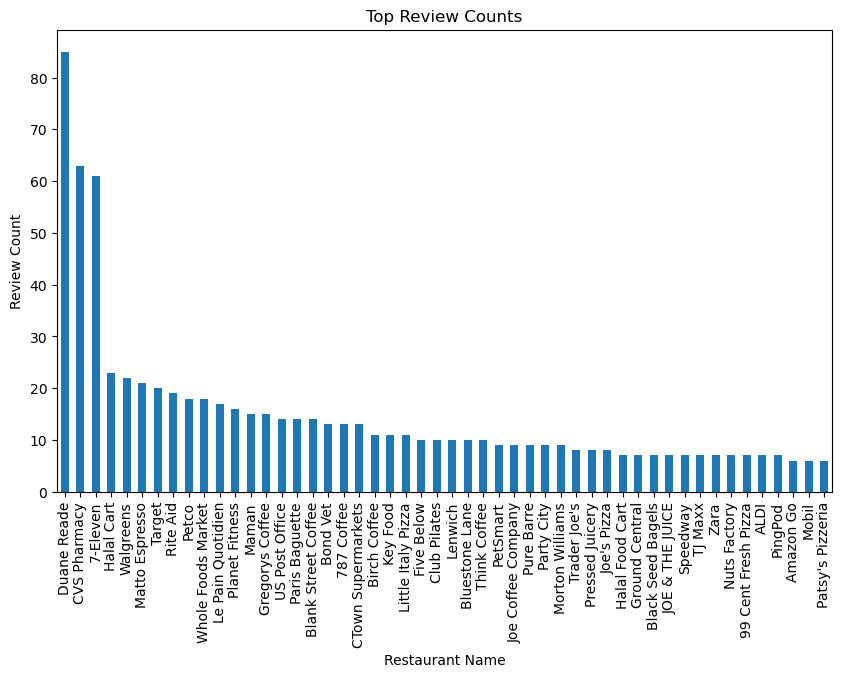

In [10]:
# 5. Top Reviewers
top_reviewers = df['name'].value_counts()
top_reviewers[:50].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Restaurant Name')
plt.ylabel('Review Count')
plt.title('Top Review Counts')
plt.show()


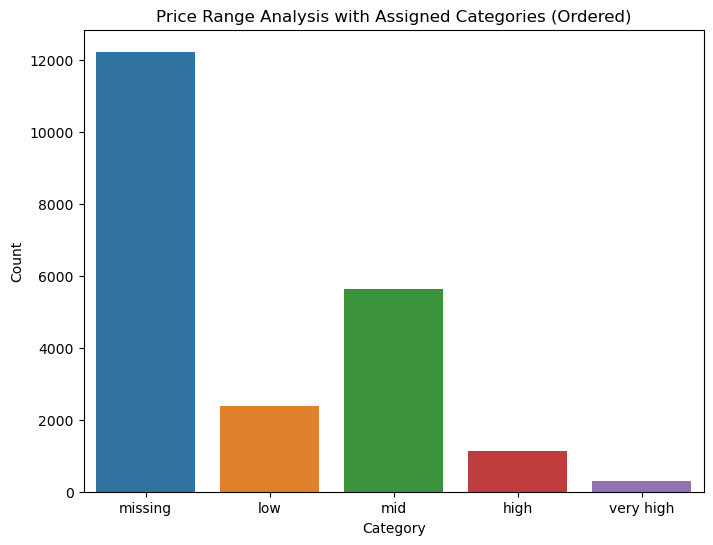

In [11]:
# Filter out rows with empty or invalid price values
filtered_df = df[df['price'].isin([0,1,2,3,4])]

# Create a new DataFrame with assigned labels
price_labels = {
    0: 'missing',
    1: 'low',
    2: 'mid',
    3: 'high',
    4: 'very high'
}

# Map the price values to their assigned labels
filtered_df['price_category'] = filtered_df['price'].map(price_labels)

# Create a new DataFrame to count the categories
price_category_counts = filtered_df['price_category'].value_counts().reset_index()
price_category_counts.columns = ['Category', 'Count']
price_category_counts

# Define the custom order for x-axis labels
custom_order = ['missing', 'low', 'mid', 'high', 'very high']

# Create a bar plot for the new DataFrame with custom label order
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Count', data=price_category_counts, order=custom_order)

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Price Range Analysis with Assigned Categories (Ordered)')

# Show the plot
plt.show()


In [12]:
import plotly.express as px
import pandas as pd

# Extract latitude and longitude from the "coordinates" column
df['latitude'] = df['coordinates'].apply(lambda x: eval(x)['latitude'])
df['longitude'] = df['coordinates'].apply(lambda x: eval(x)['longitude'])

# Create a new DataFrame with the latitude and longitude
coordinates_df = df[['latitude', 'longitude']]

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", title="Locations in Manhattan", zoom=12)

# Set the map layout to focus on Manhattan
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 40.730610, "lon": -73.935242},  # Centered on Manhattan
)

# Show the plot
fig.show()

In [13]:
# 8. Word Cloud for Reviews
reviews_text = ' '.join(df['review_text'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

KeyError: 'review_text'

In [ ]:
# 9. Review Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['review_text'].apply(get_sentiment)
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis of Reviews')
plt.show()